In [60]:
from quantum.computer import QuantumComputer
%display latex

# 1. Simon algorithm

**Exercise 1.1**: implement the Simon's circuit: write a function `simonCircuit(n, m, f)` that takes as input a function $f: \{0, 1\}^n \to X$ and outputs the outcome of the measure of the Simon circuit. (Here, we assume that elements of $X$ are encoded by integers written on $m$ bits, *e.g.* $X = \{0, 1, \ldots, 2^m-1\}$.)

In [123]:
def simonCircuit(n, m, f):
    QC=QuantumComputer()
    a=QC.malloc(n)
    b=QC.malloc(m)
    QC.hadamard(a)
    QC.apply(f,a,b)
    QC.hadamard(a)
    result=QC.measure(a)
    QC.free(a)
    QC.free(b)
    print("Orthogonal vector : ", result)
    return result
    

**Exercice 1.2**: implement Simon's algorithm: write a function `simon(n, m, f)` that takes as input a function $f: \{0, 1\}^n \to X$ with the promise that there exists `a` such that $f(x) = f(y)$ iff $y \in \{x, x+a\}$, and outputs $a$.

In [124]:
def simon(n, m, f):
    """
    Return `a` such that `f(x) = f(y)` iff `y = x` or `y = x + a`.
    """
    def test(W,n):
        if W.rank() == n-1:
            return True
        else:
            return False
    k=GF(2)
    K=k^n

    gen_family = [K(simonCircuit(n,m,f).digits(2,padto=n))]
    print(gen_family)
    
    while not test(K.span(gen_family),n):
        gen_family.append(K(simonCircuit(n,m,f).digits(2,padto=n)))
        print(gen_family)
    return K.span(gen_family).complement()


**Exercise 1.3**: write tests demonstrating that your implementation works

In [127]:
 def f(a):
     """
     Mise au carré : (Z/2^nZ)**n->(Z/2^nZ)
     x^2=y^2 mod 2^n
     -> x=y ou x=-y (Hensel)
     """
     """
    Je suis pas sûr de ce que pas réduire modulo
    n fait, je voulais utiliser x-> x^2 2^n
    mais je n'arrive pas à accéder à n.
    """
     return 2*a

def g(a):
    return a^2
    
n=5
m=5
print("Result for x->2x :",simon(n,m,f))
print("Result for x->x^2 :",simon(n,m,g))
     

Orthogonal vector :  2
[(0, 1, 0, 0, 0)]
Orthogonal vector :  10
[(0, 1, 0, 0, 0), (0, 1, 0, 1, 0)]
Orthogonal vector :  15
[(0, 1, 0, 0, 0), (0, 1, 0, 1, 0), (1, 1, 1, 1, 0)]
Orthogonal vector :  4
[(0, 1, 0, 0, 0), (0, 1, 0, 1, 0), (1, 1, 1, 1, 0), (0, 0, 1, 0, 0)]
Result for x->2x : Vector space of degree 5 and dimension 1 over Finite Field of size 2
Basis matrix:
[0 0 0 0 1]
Orthogonal vector :  1
[(1, 0, 0, 0, 0)]
Orthogonal vector :  0
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0)]
Orthogonal vector :  1
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0), (1, 0, 0, 0, 0)]
Orthogonal vector :  10
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0), (1, 0, 0, 0, 0), (0, 1, 0, 1, 0)]
Orthogonal vector :  6
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0), (1, 0, 0, 0, 0), (0, 1, 0, 1, 0), (0, 1, 1, 0, 0)]
Orthogonal vector :  13
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0), (1, 0, 0, 0, 0), (0, 1, 0, 1, 0), (0, 1, 1, 0, 0), (1, 0, 1, 1, 0)]
Orthogonal vector :  7
[(1, 0, 0, 0, 0), (0, 0, 0, 0, 0), (1, 0, 0, 0, 0), (0, 1, 0, 1, 0), (0, 1, 1, 0, 0), (1, 0,

# 2. Shor algorithm

## Controlled phase shift gate

Unfortunately, controlled phase shift gates are not builtin functions of our quantum computer.

One can nevertheless implement it in soft as follows:

In [128]:
def controlledPhaseShift(QC, c, x, angle):
    """
    INPUT:
    
    - ``QC'' -- the quantum computer on which the gate is applied
    
    - ``c'' -- the controlled register
    
    - ``x'' -- the register on which the phase shift gate acts
    
    - ``angle`` -- the angle of rotation
    """
    QC.phase_shift(c, angle/2)
    QC.phase_shift(x, angle/2)
    QC.CX(c, x)
    QC.phase_shift(x, -angle/2)
    QC.CX(c, x)

**Exercise 2.1**: prove that the function `controlledPhaseShift` works correctly.
On peut supposer que l'état interne est $|c_0>|x_0>$ où $c$ pointe sur $c0$ et $x$ pointe sur $x0$.
Alors, à la fin on obtient l'état 
$$(e^{i\theta/2})^{(c0+x0)-(c_0\oplus x_0)}|c_0>|x_0>$$
En particulier, une inspection pour $c_0,x_0\in \{0,1\}$ montre que la porte est la bonne. On remarque que si
$c_0=x_0$ le résultat 

## Quantum Fourier transform

Let $n$ be a positive integer.
We recall that the Quantum Fourier transform is the gate $\text{QFT}_n$ acting by:
$$\text{QFT}_n \left|x\right> = \frac 1{2^{n/2}} \cdot \sum_{y=0}^{2^n-1} \zeta_n^{xy} \left|y\right>$$
with $\zeta_n = \exp\big(\frac{2i\pi}{2^n}\big)$

**Exercise 2.2**: implement a function `QFT(QC, reg)` which applies the quantum Fourier transform to the register `reg` of the quantum computer `QC`.

In [151]:
def QFT(QC, reg):
    n=reg.size()
    """
    Construit le qbit 1/sqrt{2}(|0>+z_{n-i}^{x}|1>)
    """
    def QFTi(QC,reg,i):
        QC.hadamard(reg[n-i-1])
        for j in range(1,n-i):
            controlledPhaseShift(QC,reg[n-i-j],reg[n-i-1],2*pi/2^{j})
    """
    En commençant par reg[n-1],
    construit successivement le produit des qbits du dessus.
    """
    for k in range(n):
        QFTi(QC,reg,k)

## Shor circuit

**Exercise 2.3**: write a function `shorCircuit(n, m, f)` that takes as input integers $n$ and $m$ together with a function $f : \mathbb Z \to X$ (where elements of $X$ are encoded by integers written on $m$ bits, *e.g.* $X = \{0, 1, \ldots, 2^m-1\}$) and outputs the outcome of the Shor circuit (normalized as a rational number between $0$ and $1$) corresponding to these values.

In [152]:
def shorCircuit(n, m, f):
    QC=QuantumComputer()
    a=QC.malloc(n)
    b=QC.malloc(m)
    QC.hadamard(a)
    QC.apply(f,a,b)
    QFT(QC,a)
    return QC.measure(a)

**Exercise 2.4**: below is a simplified version of the Shor circuit avoiding the use of controlled shift gates; draw the corresponding circuit and prove that it is equivalent to the classical Shor circuit.

In [139]:
def simplifiedShorCircuit(n, m, f):
    QC = QuantumComputer()
    x = QC.malloc(n)
    y = QC.malloc(m)
    QC.hadamard(x)
    QC.apply(f, x, y)
    angle = 0
    outcome = 0
    for i in range(n):
        QC.phase_shift(x[n-1-i], angle)
        QC.hadamard(x[n-1-i])
        v = QC.measure(x[n-1-i])
        angle = angle/2 + (pi/2)*v
        outcome += v / 2**(n-i)
    return outcome

We now would like to observe the behavior of Shor's circuit.
For this, we use the following code which runs Shor circuit with the function `f` a bunch of times and draws an histogram of the outcomes.

In [140]:
def statistics(n, m, f, repeat=100):
    outcomes = [simplifiedShorCircuit(n, m, f) for _ in range(repeat)]
    return histogram(outcomes, bins=2^n, range=[0,1])

**Exercise 2.5**: run the function `statistics` with the functions $x \mapsto x \bmod r$ with $r = 2, 3, 4, 5, 8$ and comment the results you observe.

In [142]:
# The function x |-> x mod r
def modr(r):
    def f(x):
        return x % r
    return f

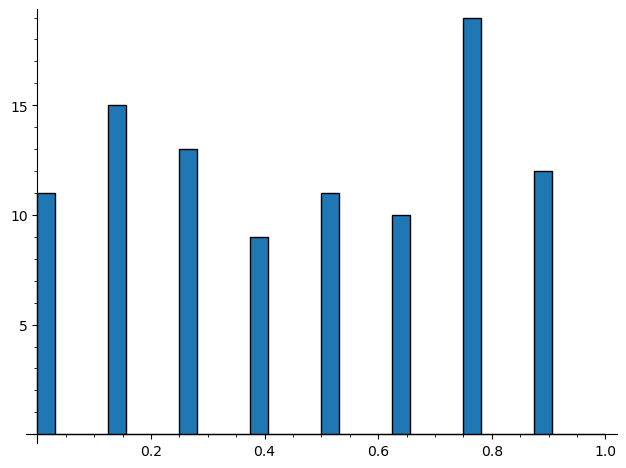

In [154]:
statistics(5,5,modr(8))

## Finding periods 

The function `continued_fractions(x)` computes the continued fraction of a real number $x$

In [129]:
CF = continued_fraction(pi)
CF

[3; 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 2, 1, 1, 2, 2, 2, 2, ...]

The convergents of $x$ (that are the rational approximations of $x$) are given by the method `convergents`. 
Precisely the call `CF.convergents()` returns the (lazy) list of convergents (this list is finite if $x$ rational, infinite otherwise).

In [130]:
CF.convergents()      # the (lazy) list of convergents of pi

lazy list [3, 22/7, 333/106, ...]

In [131]:
CF.convergents()[0]   # first approximation of pi

3

In [138]:
CF.convergents()[3]   # second approximation of pi

355/113

**Exercise 2.6**: write a function `findPeriod(n, m, f)` that returns the period of `f`

In [158]:
def findPeriod(n, m, f):
    for i in range(100):
        y=simplifiedShorCircuit(n,m,f)
        cf=continued_fraction(y/(2^n))
        for fraction in cf.convergents():
            if f(fraction.denominator())==f(0):
                return fraction.denominator()
    print("Algorithm failed")
    return 0
"""
Je devrais prendre plusieurs échantillon et
renvoyer leurs gcds.
"""

In [159]:
findPeriod(6, 3, modr(7))   # should return 7
"""
Retourne un multiple de 7
"""

455

In [160]:
findPeriod(7, 4, modr(11))  # should return 11
"""
Retourne un multiple de 11
"""

4213

In [162]:
def powermod(a, n):
    def f(x):
        return (a^x) % n
    return f
findPeriod(7, 4, powermod(2, 11))  # should return 10 (which is the order of 2 modulo 11)
"""
Retourne un multiple de 10
"""

'\nRetourne un multiple de 10\n'